# RNN DEEP LEARNING

The model starts by loading the IMDB dataset, which contains 50,000 movie reviews, each labeled as positive or negative. To simplify the task and reduce memory usage, only the 10,000 most common words in the dataset are kept.

Each review is represented as a sequence of integers, where each integer corresponds to a specific word in the dataset’s vocabulary. However, the reviews vary in length, so they are either truncated or padded to a fixed length of 200 words to ensure uniform input.

The model begins with an Embedding layer, which converts each word index into a 32-dimensional dense vector. These word embeddings help the model understand semantic meaning by learning how similar or different the words are.

Next, a SimpleRNN layer processes the embedded sequence, one word at a time. This layer maintains a "memory" of previous words using a hidden state. At each step, the RNN updates its state based on the current word and the past state, enabling it to learn context and word relationships over time.

After processing the full sequence, the RNN passes its final hidden state to a Dense (fully connected) layer with a sigmoid activation function. This layer outputs a single value between 0 and 1, representing the probability that the review is positive.

The model is compiled with the Adam optimizer and binary cross-entropy loss, which are well-suited for binary classification problems like sentiment analysis.

The model is trained over five epochs, during which it learns to minimize the loss by adjusting its internal weights. A portion of the training data is used for validation to track how well the model generalizes to unseen data.

After training, the model is evaluated on a separate test set, and its accuracy is calculated to see how well it performs in predicting the sentiment of new movie reviews.

Finally, the training and validation accuracy are plotted, allowing us to visualize whether the model improved over time and to check for signs of overfitting or underfitting.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.5403 - loss: 0.6886 - val_accuracy: 0.6236 - val_loss: 0.6518
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.7555 - loss: 0.5348 - val_accuracy: 0.6556 - val_loss: 0.6129
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.8585 - loss: 0.3590 - val_accuracy: 0.8120 - val_loss: 0.4412
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9648 - loss: 0.1207 - val_accuracy: 0.7822 - val_loss: 0.5596
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.9894 - loss: 0.0454 - val_accuracy: 0.7906 - val_loss: 0.6222
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7925 - loss: 0.6264

Test Accuracy: 0.7972


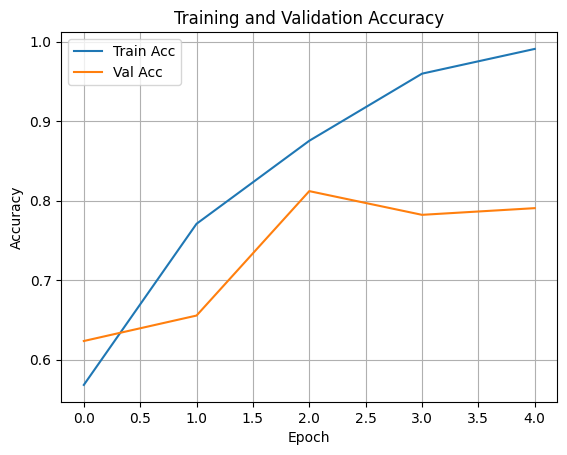

In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Loading IMDB dataset (top 10,000 words only)
vocab_size = 10000
maxlen = 200  # maximum words per review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Padding sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Building RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    SimpleRNN(32),  # basic RNN layer
    Dense(1, activation='sigmoid')  # binary classification
])

# Compiling model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.2)

# Evaluating model
loss, acc = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {acc:.4f}')

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The results from training the Recurrent Neural Network (RNN) on the IMDB movie review dataset show that the model successfully learns patterns in the data. In the first epoch, the training accuracy starts at 54%, and the validation accuracy is around 62%, indicating the model is beginning to understand basic features of sentiment. By the third epoch, the training accuracy increases to about 86%, and the validation accuracy peaks at 81.2%, which is a strong sign that the model is generalizing well to unseen data. However, after the third epoch, the training accuracy continues to rise sharply, reaching nearly 99%, while the validation accuracy slightly decreases to around 79%. This suggests the model is overfitting — it is memorizing the training data instead of learning general patterns. The final test accuracy is approximately 79.7%, confirming that the model performs reasonably well on completely new data. The plotted graph also supports this conclusion, showing a widening gap between training and validation accuracy after the third epoch. To improve performance, techniques like dropout or switching to more advanced architectures such as LSTM could help reduce overfitting. Overall, the RNN effectively captures sentiment patterns in text but could benefit from regularization.